In [1]:
import pandas as pd

In [2]:
pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

In [4]:
wine=fetch_ucirepo(id=109)

In [5]:
wine

{'data': {'ids': None,
  'features':      Alcohol  Malicacid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
  0      14.23       1.71  2.43               15.6        127           2.80   
  1      13.20       1.78  2.14               11.2        100           2.65   
  2      13.16       2.36  2.67               18.6        101           2.80   
  3      14.37       1.95  2.50               16.8        113           3.85   
  4      13.24       2.59  2.87               21.0        118           2.80   
  ..       ...        ...   ...                ...        ...            ...   
  173    13.71       5.65  2.45               20.5         95           1.68   
  174    13.40       3.91  2.48               23.0        102           1.80   
  175    13.27       4.28  2.26               20.0        120           1.59   
  176    13.17       2.59  2.37               20.0        120           1.65   
  177    14.13       4.10  2.74               24.5         96           2.05   
  
  

In [6]:
wine.data.features

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [7]:
X=wine.data.features

In [8]:
y=wine.data.targets

In [9]:
X.head(5)

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [10]:
y

,class
0,1
1,1
2,1
3,1
4,1
...,...
173,3
174,3
175,3
176,3


In [11]:
import seaborn as sns

<Axes: xlabel='class', ylabel='count'>

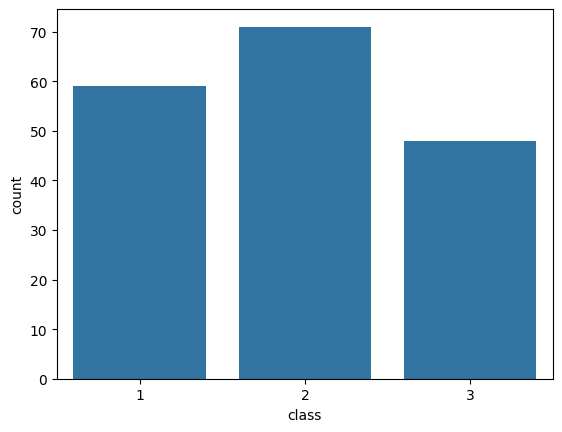

In [12]:
sns.countplot(x='class',data=y)

In [13]:
y['class']=y['class'].replace(
    {
        1:0,
        2:1,
        3:2
    })

/tmp/ipython-input-3947091129.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['class']=y['class'].replace(


In [14]:
import seaborn as sns

<Axes: xlabel='class', ylabel='count'>

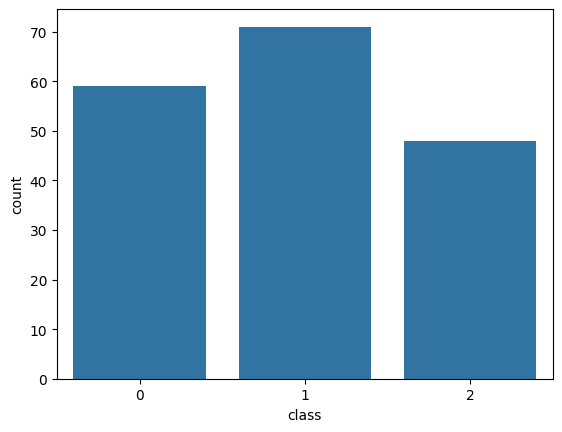

In [15]:
sns.countplot(x='class',data=y)

In [16]:
from sklearn.model_selection import train_test_split as separar

In [17]:
X_train,X_test,y_train,y_test=separar(X,y,test_size=0.25,random_state=0)

In [18]:
X_train.shape

(133, 13)

In [19]:
y_train.shape

(133, 1)

In [20]:
X_test.shape

(45, 13)

In [21]:
y_test.shape

(45, 1)

CLASIFICACIÓN

In [22]:
import xgboost as xgb

In [23]:
xgb_model=xgb.XGBClassifier(
    learning_rate=0.95,
    max_depth=12,
    alpha=12,
    random_state=41
)

In [24]:
xgb_model.fit(X_train,y_train)

XGBClassifier(alpha=12, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.95, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=12,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, ...)

In [25]:
y_test_pred=xgb_model.predict(X_test)

In [26]:
y_test_pred_proba=xgb_model.predict_proba(X_test)

In [27]:
from sklearn import metrics

In [28]:
auc_test=metrics.roc_auc_score(y_test,y_test_pred_proba,multi_class="ovr", average='weighted')

In [29]:
auc_test

np.float64(0.9729229229229228)

In [30]:
metrics.accuracy_score(y_test,y_test_pred)

0.9333333333333333

REGRESION

In [31]:
wine_data_features=pd.DataFrame(wine.data.features)

In [32]:
wine_data_features.head(5)

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [33]:
X=wine_data_features.iloc[:,0:-1]

In [34]:
X

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93
...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62


In [35]:
y=wine_data_features['Proline']

In [36]:
y

,Proline
0,1065
1,1050
2,1185
3,1480
4,735
...,...
173,740
174,750
175,835
176,840


In [37]:
from sklearn.model_selection import train_test_split as separar

In [38]:
X_train,X_test,y_train,y_test=separar(X,y,test_size=0.25,random_state=0)

In [39]:
X_train.shape

(133, 12)

In [40]:
y_train.shape

(133,)

In [41]:
X_test.shape

(45, 12)

In [42]:
y_test.shape

(45,)

In [43]:
import xgboost as xgb

In [44]:
# create an xgboost regression model
model = xgb.XGBRegressor()

In [45]:
xgb_model_reg=xgb.XGBRegressor(objective="reg:linear", random_state=42)

In [46]:
xgb_model_reg.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:57:55] WARNING: /workspace/src/objective/regression_obj.cu:282: reg:linear is now deprecated in favor of reg:squarederror.
  bst.update(dtrain, iteration=i, fobj=obj)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [47]:
y_test_pred_reg=xgb_model_reg.predict(X_test)

In [48]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [49]:
mse=mean_squared_error(
    y_true=y_test,
    y_pred=y_test_pred_reg
)

In [50]:
mse

45696.87109375

In [51]:
#coeficiente de determinacion

In [52]:
r2 = r2_score(y_test, y_test_pred_reg)

In [53]:
r2

0.6194362640380859

In [54]:
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 45696.87109375
R^2 Score: 0.6194362640380859
